#  H1N1 Vaccination Shot Prediction

Objective is to perform a  classification of whether a person will or will not take the H1N1 vaccine

# Data Collection

Data was collected from  Centers for Disease Control and Prevention (National Public Health Agency of the United States).<br>
The data contains  170 + features containing behaviour, knowledge, concern, opinion, demographics and health realted queries of the surveyee regarding H1N1 influenza virus.<br><br>
The data was collected from https://www.cdc.gov/nchs/nis/data_files_h1n1.htm

# Libraries used in Project

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [181]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [182]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix

In [183]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn import naive_bayes

# Importing dataset

In [185]:
df = pd.read_csv("H1N1.CSV")

In [186]:
df.head()

,INT_MONTH,LANGUAGE,SAMP_DESIG,SEQNUMHH,SEQNUMP,SUBGROUP,VACC1_H1N1_M,VACC1_H1N1_T,VACC1_H1N1_Y,VACC1_SEAS_M,...,RACEETH4_I,RACE_I_R,RENT_OWN_R,SEX_I,CEN_REG,FLUWT,HHS_REGION,MSA3_I,MSA_DEF,STATE
0,OCT09,1,FR,38548,385481,A,NaN,NaN,NaN,NaN,...,3,1,2.0,2,4,213.304270,6,1,NOV 2008,35
1,OCT09,1,FR,18823,188231,A,NaN,NaN,NaN,10.0,...,4,3,2.0,2,2,5160.215000,5,2,NOV 2008,39
2,OCT09,1,FR,18823,188232,C,NaN,NaN,NaN,10.0,...,1,3,2.0,2,2,20235.802976,5,2,NOV 2008,39
3,NOV09,1,FR,54046,540461,A,NaN,NaN,NaN,10.0,...,3,1,1.0,2,4,804.891317,10,3,NOV 2008,16
4,OCT09,1,FR,21986,219861,A,NaN,NaN,NaN,NaN,...,3,1,1.0,2,4,2849.547713,10,1,NOV 2008,41


# Data summary

In [187]:
df.shape

(70944, 171)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70944 entries, 0 to 70943
Columns: 171 entries, INT_MONTH to STATE
dtypes: float64(153), int64(14), object(4)
memory usage: 92.6+ MB


In [189]:
df.describe()

,LANGUAGE,SEQNUMHH,SEQNUMP,VACC1_H1N1_M,VACC1_H1N1_T,VACC1_H1N1_Y,VACC1_SEAS_M,VACC1_SEAS_T,VACC1_SEAS_Y,VACC2_H1N1_M,...,Q95_OCCPN,RACEETH4_I,RACE_I_R,RENT_OWN_R,SEX_I,CEN_REG,FLUWT,HHS_REGION,MSA3_I,STATE
count,70944.000000,70944.000000,70944.000000,16076.000000,16838.000000,16076.000000,31024.000000,32153.000000,31024.000000,1755.000000,...,28693.000000,70944.000000,70944.000000,67213.000000,70944.000000,70944.000000,70944.000000,70944.000000,70944.000000,70944.000000
mean,1.045980,28306.569308,283066.894480,8.968649,1.162371,2009.198495,9.666001,1.055205,2009.040291,7.478063,...,12.941554,2.827681,1.238526,2.912026,1.571084,2.703837,4218.164806,5.353871,1.973951,28.630821
std,0.248418,16367.321043,163673.209285,3.814291,0.368802,0.398879,1.861818,0.228383,0.196645,4.807225,...,14.985142,0.656012,0.577033,12.568070,0.494925,1.032971,6977.696029,2.699119,0.741232,15.789905
min,1.000000,1.000000,11.000000,1.000000,1.000000,2009.000000,1.000000,1.000000,2009.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.030860,1.000000,1.000000,1.000000
25%,1.000000,14123.750000,141238.500000,9.000000,1.000000,2009.000000,9.000000,1.000000,2009.000000,2.000000,...,5.000000,3.000000,1.000000,1.000000,1.000000,2.000000,787.226497,3.000000,1.000000,16.000000
50%,1.000000,28293.500000,282936.000000,11.000000,1.000000,2009.000000,10.000000,1.000000,2009.000000,11.000000,...,10.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2025.366299,5.000000,2.000000,29.000000
75%,1.000000,42499.250000,424993.500000,11.000000,1.000000,2009.000000,10.000000,1.000000,2009.000000,12.000000,...,17.000000,3.000000,1.000000,2.000000,2.000000,4.000000,4722.788381,8.000000,3.000000,42.000000
max,3.000000,56658.000000,566581.000000,12.000000,2.000000,2010.000000,12.000000,2.000000,2010.000000,12.000000,...,98.000000,4.000000,3.000000,99.000000,2.000000,4.000000,192422.453196,10.000000,3.000000,56.000000


In [190]:
df.columns

Index(['INT_MONTH', 'LANGUAGE', 'SAMP_DESIG', 'SEQNUMHH', 'SEQNUMP',
       'SUBGROUP', 'VACC1_H1N1_M', 'VACC1_H1N1_T', 'VACC1_H1N1_Y',
       'VACC1_SEAS_M',
       ...
       'RACEETH4_I', 'RACE_I_R', 'RENT_OWN_R', 'SEX_I', 'CEN_REG', 'FLUWT',
       'HHS_REGION', 'MSA3_I', 'MSA_DEF', 'STATE'],
      dtype='object', length=171)

# Features for Analysis

### As the data contains 171 columns but all are not related to behaviour and demographic thus we will remove the rest

### Columns that are to kept are related to following topics
- **BEHAVIORAL INDICATOR**
    - B_H1N1_ANTIV: TAKING ANTIVIRAL MEDICATIONS
    - B_H1N1_AVOID: AVOID CLOSE CONTACT WITH OTHERS WITH FLULIKE SYMPTOMS
    - B_H1N1_FMASK: BOUGHT A FACE MASK
    - B_H1N1_HANDS: WASHING HANDS
    - B_H1N1_LARGE: REDUCED TIME AT LARGE GATHERINGS
    - B_H1N1_RCONT: REDUCED CONTACT OUTSIDE THE HOME
    - B_H1N1_TOUCH: AVOID TOUCHING EYES, NOSE, OR MOUTH
- **OPINION**
    - HQ23: EFFECTIVENESS OF H1N1 VACCINE
    - HQ24: RISK OF GETTING SICK WITH H1N1 FLU WITHOUT VACCINE
    - HQ24_B: WORRY ABOUT GETTING SICK FROM THE H1N1 VACCINE
- **CONCERN**
    - CONCERN_DKNW_F: H1N1 CONCERN LEVEL UNKNOWN
    - CONCERN_NONE_F:NOT AT ALL CONCERNED ABOUT H1N1 FLU
    - CONCERN_NOTV_F:NOT VERY CONCERNED ABOUT H1N1 FLU
    - CONCERN_REFD_F:H1N1 CONCERN LEVEL REFUSED
    - CONCERN_SOME_F:SOMEWHAT CONCERNED ABOUT H1N1 FLU
    - CONCERN_VERY_F:VERY CONCERNED ABOUT H1N1 FLU
- **KNOWLEDGE**
    - KNOW_H1N1_ALOT_F: A LOT OF KNOWLEDGE ABOUT H1N1 FL
    - KNOW_H1N1_DKNW_F: KNOWLEDGE LEVEL ABOUT H1N1 FLU UNKNOWN
    - KNOW_H1N1_LITL_F: A LITTLE KNOWLEDGE ABOUT H1N1 FLU
    - KNOW_H1N1_NONE_F: NO KNOWLEDGE ABOUT H1N1 FLU
    - KNOW_H1N1_REFD_F: KNOWLEDGE LEVEL ABOUT H1N1 FLU REFUSED
- **VACC_H1N1_COUNT: NUMBER OF H1N1 FLU VACCINATIONS**
- **OTHERS**
    - DOCREC_H1N1_F: DOCTORS RECOMMENDATION FOR H1N1 VACCINE
    - INSURE: HAS HEALTH INSURANCE COVERAGE
    - HEALTH_WORKER_F: WORKS IN HEALTH CARE FIELD FLAG
    - CHRONIC_MED_F: CHRONIC MEDICAL CONDITION FLAG
    - PATIENT_CONTACT_F: DIRECT PATIENT CONTACT FLAG
    - CLOSE_UNDER6MO_F: CLOSE CONTACT WITH CHILD UNDER 6 MONTHS FLAG
    - AGEGRP: AGE GROUP
    - EDUCATION_COMP: ADULT SELF-REPORTED EDUCATION LEVEL
    - INC_CAT1: HOUSEHOLD INCOME CATEGORY
    - RENT_OWN_R: IS HOME RENTED OR OWNED
    - SEX_I: GENDER OF PERSON
    - MARITAL: MARITAL STATUS
    - RACE_I_R: RACE WITH MULTIRACE CATEGORY
    - Q95: WORK STATUS
    - Q95INDSTR: EMPLOYMENT INDUSTRY TYPE CODE
    - MSA3_I: 3-CATEGORY MSA STATUS
    - HHS_REGION: HHS SURVEILLANCE REGION NUMBER

In [191]:
columns_to_keep = [
    'B_H1N1_ANTIV', 'B_H1N1_AVOID', 'B_H1N1_FMASK', 'B_H1N1_HANDS', 'B_H1N1_LARGE',
    'B_H1N1_RCONT', 'B_H1N1_TOUCH', 'HQ23', 'HQ24', 'HQ24_B', 'CONCERN_DKNW_F',
    'CONCERN_NONE_F', 'CONCERN_NOTV_F', 'CONCERN_REFD_F', 'CONCERN_SOME_F', 'CONCERN_VERY_F',
    'KNOW_H1N1_ALOT_F', 'KNOW_H1N1_DKNW_F', 'KNOW_H1N1_LITL_F', 'KNOW_H1N1_NONE_F', 'KNOW_H1N1_REFD_F',
    'DOCREC_H1N1_F', 'INSURE', 'HEALTH_WORKER_F', 'CHRONIC_MED_F', 'PATIENT_CONTACT_F',
    'CLOSE_UNDER6MO_F', 'AGEGRP', 'EDUCATION_COMP', 'INC_CAT1', 'RENT_OWN_R',
    'SEX_I', 'MARITAL', 'RACE_I_R', 'Q95', 'Q95_INDSTR',
    'MSA3_I','HHS_REGION','VACC_H1N1_COUNT'
]

# Drop columns not in columns_to_keep
df = df[columns_to_keep]

In [192]:
df.shape

(70944, 39)

# Data Cleaning

## 1.Checking null values

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70944 entries, 0 to 70943
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   B_H1N1_ANTIV       56481 non-null  float64
 1   B_H1N1_AVOID       56194 non-null  float64
 2   B_H1N1_FMASK       56615 non-null  float64
 3   B_H1N1_HANDS       56559 non-null  float64
 4   B_H1N1_LARGE       56486 non-null  float64
 5   B_H1N1_RCONT       56474 non-null  float64
 6   B_H1N1_TOUCH       56374 non-null  float64
 7   HQ23               56017 non-null  float64
 8   HQ24               55930 non-null  float64
 9   HQ24_B             55852 non-null  float64
 10  CONCERN_DKNW_F     56656 non-null  float64
 11  CONCERN_NONE_F     56656 non-null  float64
 12  CONCERN_NOTV_F     56656 non-null  float64
 13  CONCERN_REFD_F     56656 non-null  float64
 14  CONCERN_SOME_F     56656 non-null  float64
 15  CONCERN_VERY_F     56656 non-null  float64
 16  KNOW_H1N1_ALOT_F   566

In [194]:
(df.isnull().sum() /  df.shape[0]) * 100

B_H1N1_ANTIV         20.386502
B_H1N1_AVOID         20.791046
B_H1N1_FMASK         20.197621
B_H1N1_HANDS         20.276556
B_H1N1_LARGE         20.379454
B_H1N1_RCONT         20.396369
B_H1N1_TOUCH         20.537325
HQ23                 21.040539
HQ24                 21.163171
HQ24_B               21.273117
CONCERN_DKNW_F       20.139829
CONCERN_NONE_F       20.139829
CONCERN_NOTV_F       20.139829
CONCERN_REFD_F       20.139829
CONCERN_SOME_F       20.139829
CONCERN_VERY_F       20.139829
KNOW_H1N1_ALOT_F     20.139829
KNOW_H1N1_DKNW_F     20.139829
KNOW_H1N1_LITL_F     20.139829
KNOW_H1N1_NONE_F     20.139829
KNOW_H1N1_REFD_F     20.139829
DOCREC_H1N1_F         4.406292
INSURE               45.523230
HEALTH_WORKER_F      22.571324
CHRONIC_MED_F         3.179973
PATIENT_CONTACT_F    26.519508
CLOSE_UNDER6MO_F     22.629116
AGEGRP                0.000000
EDUCATION_COMP       24.400936
INC_CAT1             21.443674
RENT_OWN_R            5.259078
SEX_I                 0.000000
MARITAL 

## 2.Dropping rows having null values most of the features

In [195]:
# List of columns to check for null values
columns_to_check = ['CONCERN_DKNW_F', 'CONCERN_NONE_F', 'CONCERN_NOTV_F', 'CONCERN_REFD_F', 
                    'CONCERN_SOME_F', 'CONCERN_VERY_F', 'KNOW_H1N1_ALOT_F', 'KNOW_H1N1_DKNW_F', 
                    'KNOW_H1N1_LITL_F', 'KNOW_H1N1_NONE_F', 'KNOW_H1N1_REFD_F']

# Drop rows with null values in the specified columns
df = df.dropna(subset=columns_to_check, how='all')

In [196]:
df.isnull().sum()

B_H1N1_ANTIV           175
B_H1N1_AVOID           462
B_H1N1_FMASK            41
B_H1N1_HANDS            97
B_H1N1_LARGE           170
B_H1N1_RCONT           182
B_H1N1_TOUCH           282
HQ23                   639
HQ24                   726
HQ24_B                 804
CONCERN_DKNW_F           0
CONCERN_NONE_F           0
CONCERN_NOTV_F           0
CONCERN_REFD_F           0
CONCERN_SOME_F           0
CONCERN_VERY_F           0
KNOW_H1N1_ALOT_F         0
KNOW_H1N1_DKNW_F         0
KNOW_H1N1_LITL_F         0
KNOW_H1N1_NONE_F         0
KNOW_H1N1_REFD_F         0
DOCREC_H1N1_F         3081
INSURE               25808
HEALTH_WORKER_F       1725
CHRONIC_MED_F         2065
PATIENT_CONTACT_F     4526
CLOSE_UNDER6MO_F      1766
AGEGRP                   0
EDUCATION_COMP        3023
INC_CAT1             13299
RENT_OWN_R            3385
SEX_I                    0
MARITAL               3061
RACE_I_R                 0
Q95                   2760
Q95_INDSTR           27963
MSA3_I                   0
H

In [197]:
(df.isnull().sum() /  df.shape[0]) * 100

B_H1N1_ANTIV          0.308882
B_H1N1_AVOID          0.815448
B_H1N1_FMASK          0.072367
B_H1N1_HANDS          0.171209
B_H1N1_LARGE          0.300056
B_H1N1_RCONT          0.321237
B_H1N1_TOUCH          0.497741
HQ23                  1.127859
HQ24                  1.281418
HQ24_B                1.419091
CONCERN_DKNW_F        0.000000
CONCERN_NONE_F        0.000000
CONCERN_NOTV_F        0.000000
CONCERN_REFD_F        0.000000
CONCERN_SOME_F        0.000000
CONCERN_VERY_F        0.000000
KNOW_H1N1_ALOT_F      0.000000
KNOW_H1N1_DKNW_F      0.000000
KNOW_H1N1_LITL_F      0.000000
KNOW_H1N1_NONE_F      0.000000
KNOW_H1N1_REFD_F      0.000000
DOCREC_H1N1_F         5.438082
INSURE               45.552104
HEALTH_WORKER_F       3.044691
CHRONIC_MED_F         3.644804
PATIENT_CONTACT_F     7.988563
CLOSE_UNDER6MO_F      3.117057
AGEGRP                0.000000
EDUCATION_COMP        5.335710
INC_CAT1             23.473242
RENT_OWN_R            5.974654
SEX_I                 0.000000
MARITAL 

Columns 'INSURE', 'Q95_INDSTR' , 'INC_CAT1' contain too many NULL values

## 3.Droping columns having too many NULL values

In [198]:
# close to half the values of these columns are NULL so discarding
df.drop(['INSURE', 'Q95_INDSTR' , 'INC_CAT1'],axis=1,inplace = True)

## 4. Imputing Missing Values

In [199]:
df.nunique()

B_H1N1_ANTIV          2
B_H1N1_AVOID          2
B_H1N1_FMASK          2
B_H1N1_HANDS          2
B_H1N1_LARGE          2
B_H1N1_RCONT          2
B_H1N1_TOUCH          2
HQ23                  6
HQ24                  6
HQ24_B                6
CONCERN_DKNW_F        2
CONCERN_NONE_F        2
CONCERN_NOTV_F        2
CONCERN_REFD_F        2
CONCERN_SOME_F        2
CONCERN_VERY_F        2
KNOW_H1N1_ALOT_F      2
KNOW_H1N1_DKNW_F      2
KNOW_H1N1_LITL_F      2
KNOW_H1N1_NONE_F      2
KNOW_H1N1_REFD_F      2
DOCREC_H1N1_F         2
HEALTH_WORKER_F       2
CHRONIC_MED_F         2
PATIENT_CONTACT_F     2
CLOSE_UNDER6MO_F      2
AGEGRP                5
EDUCATION_COMP        4
RENT_OWN_R            4
SEX_I                 2
MARITAL               2
RACE_I_R              3
Q95                   5
MSA3_I                3
HHS_REGION           10
VACC_H1N1_COUNT       3
dtype: int64

In [200]:
MODE= [
    'B_H1N1_ANTIV', 'B_H1N1_AVOID', 'B_H1N1_FMASK', 'B_H1N1_HANDS', 'B_H1N1_LARGE',
    'B_H1N1_RCONT', 'B_H1N1_TOUCH', 'HQ23', 'HQ24', 'HQ24_B',
    'DOCREC_H1N1_F', 'HEALTH_WORKER_F', 'CHRONIC_MED_F', 'PATIENT_CONTACT_F',
    'CLOSE_UNDER6MO_F', 'SEX_I', 'MARITAL', 'RACE_I_R','VACC_H1N1_COUNT']


MEDIAN = ['AGEGRP', 'EDUCATION_COMP', 'RENT_OWN_R' ,'Q95']

for col in MODE:
    if df[col].isnull().sum():
        df[col].loc[(df[col].isnull())] = df[col].mode().max()
        
for col in MEDIAN:
    if df[col].isnull().sum():
        df[col].loc[(df[col].isnull())] = df[col].median()

### Sanity Check 

In [201]:
df.isnull().sum()

B_H1N1_ANTIV         0
B_H1N1_AVOID         0
B_H1N1_FMASK         0
B_H1N1_HANDS         0
B_H1N1_LARGE         0
B_H1N1_RCONT         0
B_H1N1_TOUCH         0
HQ23                 0
HQ24                 0
HQ24_B               0
CONCERN_DKNW_F       0
CONCERN_NONE_F       0
CONCERN_NOTV_F       0
CONCERN_REFD_F       0
CONCERN_SOME_F       0
CONCERN_VERY_F       0
KNOW_H1N1_ALOT_F     0
KNOW_H1N1_DKNW_F     0
KNOW_H1N1_LITL_F     0
KNOW_H1N1_NONE_F     0
KNOW_H1N1_REFD_F     0
DOCREC_H1N1_F        0
HEALTH_WORKER_F      0
CHRONIC_MED_F        0
PATIENT_CONTACT_F    0
CLOSE_UNDER6MO_F     0
AGEGRP               0
EDUCATION_COMP       0
RENT_OWN_R           0
SEX_I                0
MARITAL              0
RACE_I_R             0
Q95                  0
MSA3_I               0
HHS_REGION           0
VACC_H1N1_COUNT      0
dtype: int64

In [202]:
df.shape

(56656, 36)

# Target Variable

Creating the target variable H1N1_TAKEN from VACC_H1N1_COUNT

In [203]:
df.VACC_H1N1_COUNT.value_counts()

0.0    44736
1.0    11506
2.0      414
Name: VACC_H1N1_COUNT, dtype: int64

In [204]:
df['H1N1_TAKEN'] = df['VACC_H1N1_COUNT'].map({0.0: 0, 1.0: 1, 2.0: 1})

In [205]:
df.H1N1_TAKEN.value_counts(normalize=True)   # class imbalance problem

0    0.789607
1    0.210393
Name: H1N1_TAKEN, dtype: float64

In [206]:
df.drop('VACC_H1N1_COUNT',axis=1,inplace = True)

In [207]:
df.shape

(56656, 36)

## 3. Exploratory Data Analysis and Visualizations

Firstly Analyzing the number of people who took vaccine and not

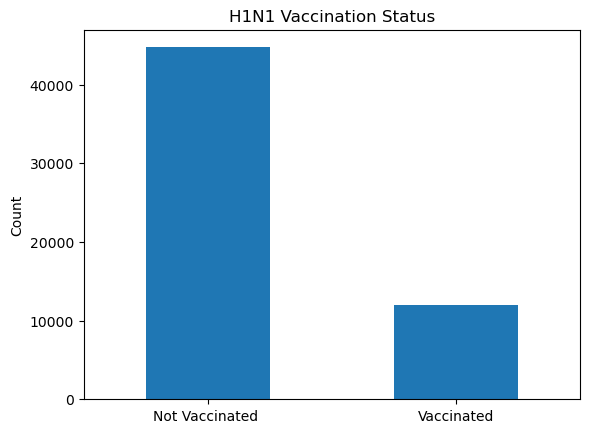

In [208]:
# Graph for relationship between H1N1 vaccination status
df.H1N1_TAKEN.value_counts().plot.bar()
plt.title('H1N1 Vaccination Status')
plt.ylabel('Count')
plt.xticks([0,1],['Not Vaccinated ', 'Vaccinated'], rotation = 0)
plt.show()

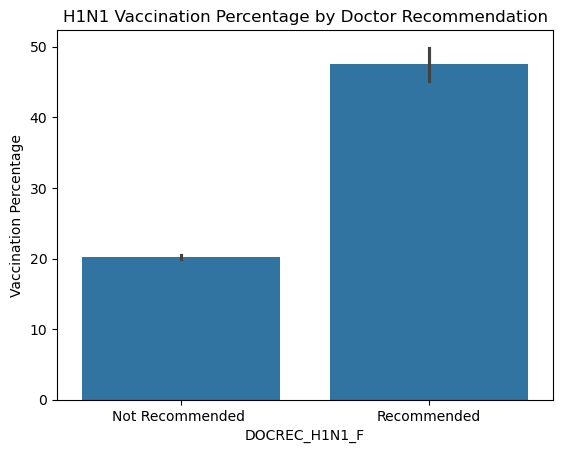

In [209]:
# Graph for relationship between H1N1 vaccination and Doctor recommendation
sns.barplot(x=df['DOCREC_H1N1_F'], y=df['H1N1_TAKEN']*100)
plt.title('H1N1 Vaccination Percentage by Doctor Recommendation')
plt.xticks([0,1],['Not Recommended ', 'Recommended'], rotation = 0)
plt.ylabel('Vaccination Percentage')
plt.show()

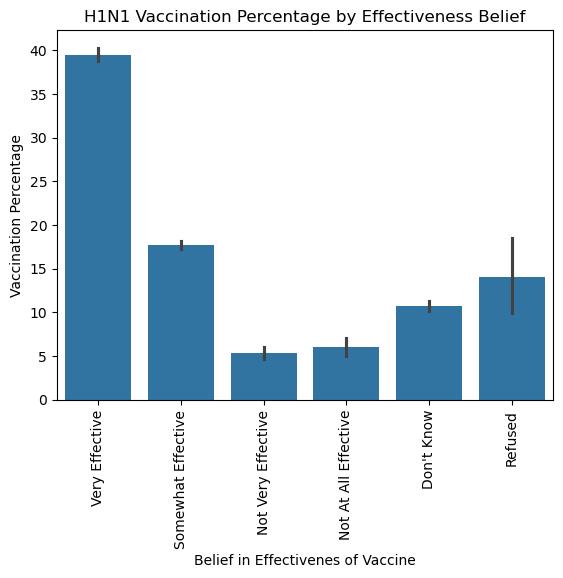

In [210]:
# Graph for vaccine percentage differrentiation depending on opinion of effectiveness of H1N1 Vaccine
sns.barplot(x=df['HQ23'], y=df['H1N1_TAKEN']*100)
plt.xlabel('Belief in Effectivenes of Vaccine')
plt.ylabel('Vaccination Percentage')
plt.title('H1N1 Vaccination Percentage by Effectiveness Belief')
plt.xticks([0,1,2,3,4,5],["Very Effective", "Somewhat Effective", "Not Very Effective", "Not At All Effective", "Don't Know", "Refused"], rotation = 90)

plt.show()


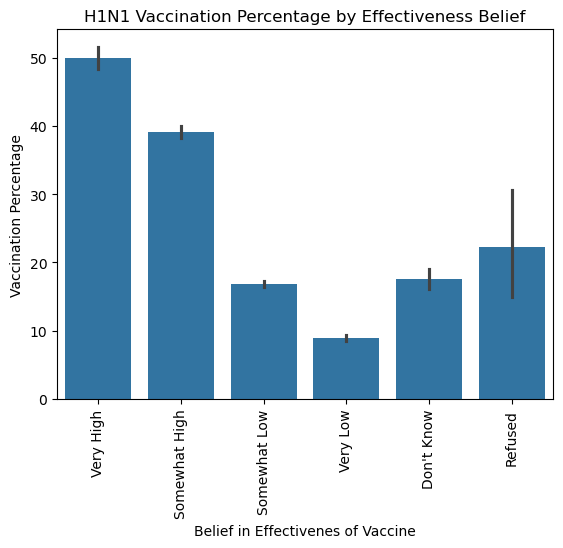

In [211]:
# Risk graph exploring vaccine percentage depending on risk perception of H1N1
sns.barplot(x=df['HQ24'], y=df['H1N1_TAKEN']*100)
plt.xlabel('Belief in Effectivenes of Vaccine')
plt.ylabel('Vaccination Percentage')
plt.title('H1N1 Vaccination Percentage by Effectiveness Belief')
plt.xticks([0,1,2,3,4,5],["Very High", "Somewhat High", "Somewhat Low", "Very Low", "Don't Know", "Refused"], rotation = 90)

plt.show()

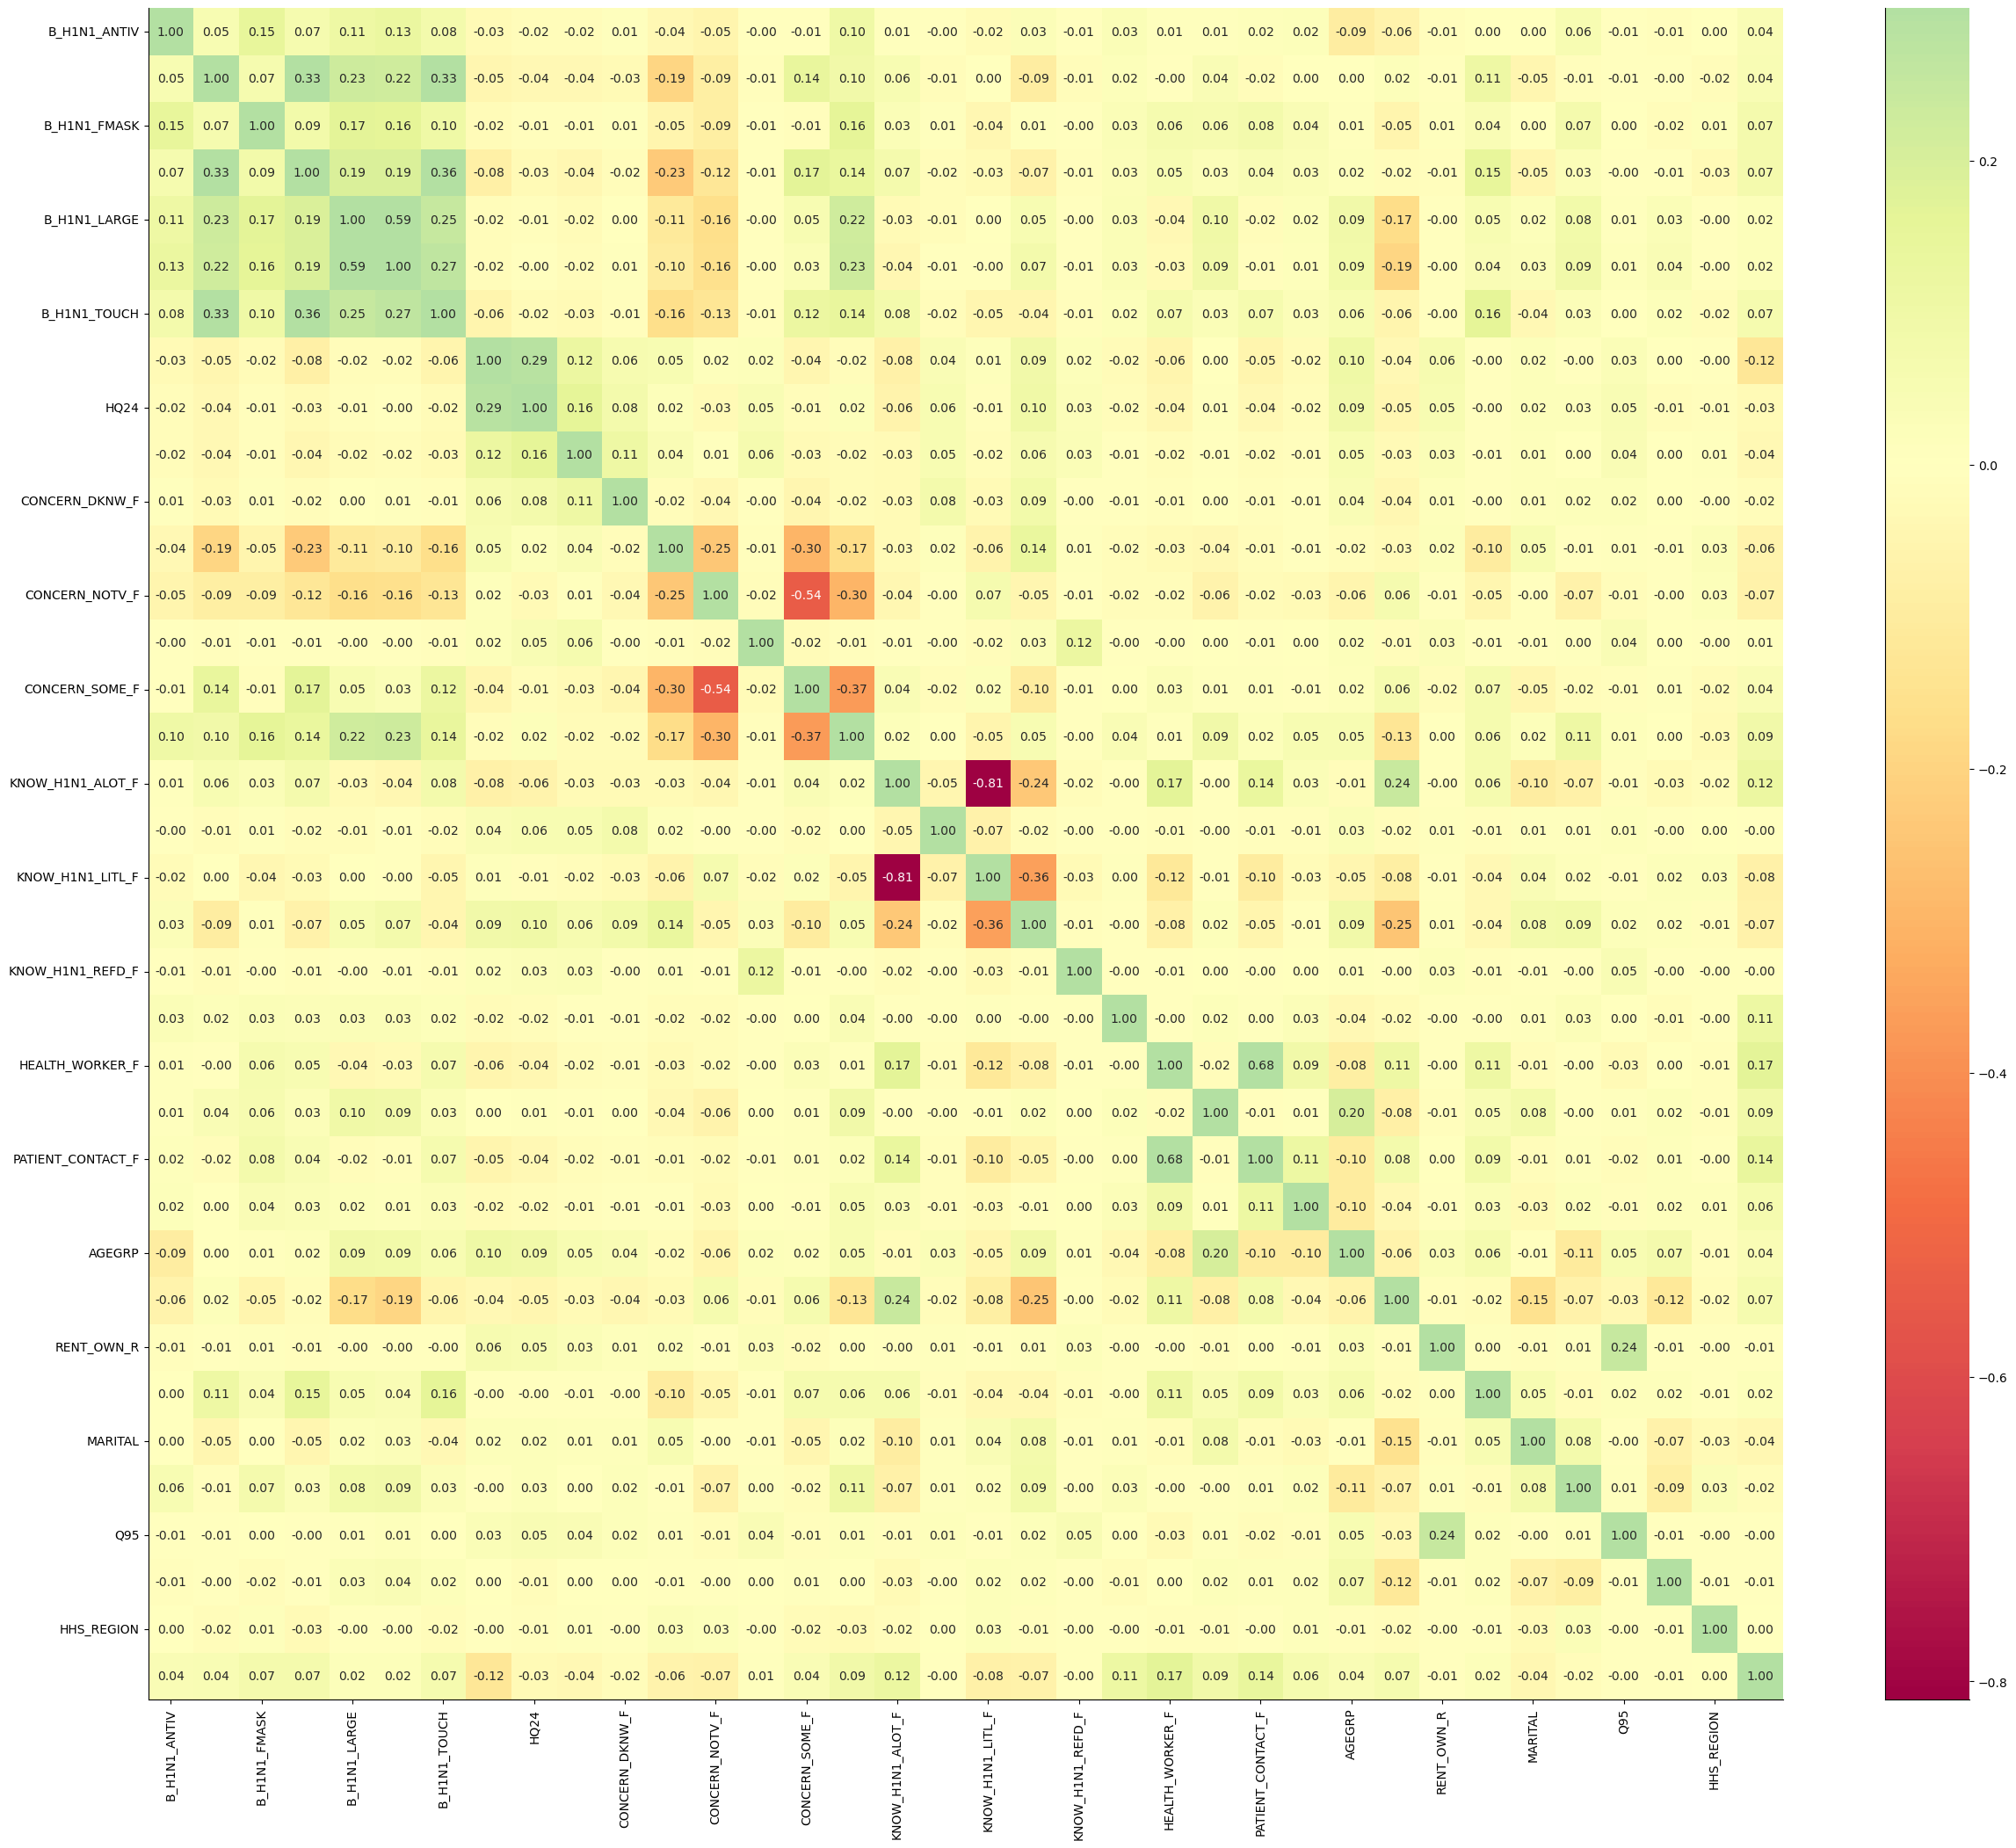

In [212]:
# Plotting Correlation Maps of the Features
g = sns.heatmap(df.corr(),  vmax=.3, center=0,  annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30,25)
plt.show()

# Data Preprocessing

In [213]:
X = df.drop(columns = ['H1N1_TAKEN'], axis=1)
y = df['H1N1_TAKEN']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [215]:
scaler= MinMaxScaler()  # Scaling the numbers by MinMaxScaler

In [216]:
X_train = scaler.fit_transform(X_train)

In [217]:
X_train.shape

(45324, 35)

In [218]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.010204,0.010204,0.010204,...,0.0,0.50,0.666667,0.0,1.0,1.0,1.0,0.0,1.0,0.888889
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.010204,0.010204,0.030612,...,0.0,0.50,1.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.444444
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.000000,1.000000,1.000000,...,0.0,0.75,1.000000,0.0,0.0,1.0,0.0,0.0,0.5,0.333333
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.010204,0.020408,0.020408,...,0.0,0.00,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.020408,0.020408,...,0.0,0.00,1.000000,0.0,0.0,1.0,0.0,0.0,0.5,0.777778


In [219]:
X_test = scaler.transform(X_test)

In [220]:
X_test.shape

(11332, 35)

In [221]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.010204,0.010204,0.010204,...,1.0,0.25,1.0,0.000000,1.0,0.0,0.5,0.0,0.0,0.444444
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.010204,0.030612,0.030612,...,0.0,1.00,1.0,0.000000,1.0,0.0,0.0,0.0,0.5,0.333333
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.020408,0.020408,...,0.0,0.50,1.0,0.000000,1.0,0.0,0.0,0.0,0.5,0.333333
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.775510,0.030612,0.020408,...,0.0,0.00,0.0,0.010204,0.0,0.0,0.0,0.0,0.5,0.333333
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.010204,0.030612,0.030612,...,0.0,0.50,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.777778


# Model evaluation

In [222]:
def evaluate(model, X_train, X_test, y_train, y_test):
    
    #  predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    print("Training Scores:")
    print("Train Accuracy --->",accuracy_score(y_train, train_pred))
    print("Train Precision --->",precision_score(y_train, train_pred))
    print("Train Recall --->",recall_score(y_train, train_pred))
    print("Train F1_Score --->",f1_score(y_train, train_pred))
    print("")
    
    print("Testing Scores:")
    print("Test Accuracy --->",accuracy_score(y_test, test_pred))
    print("Test Precision --->",precision_score(y_test, test_pred))
    print("Test Recall --->",recall_score(y_test, test_pred))
    print("Test F1_Score --->",f1_score(y_test, test_pred))



### MODEL 1: logistic regression

In [240]:
logreg = LogisticRegression(random_state=42)

# Fitting the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Evaluating the logistic regression for various metrics
evaluate(logreg, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7944135557320625
Train Precision ---> 0.5638921453692849
Train Recall ---> 0.10088087248322147
Train F1_Score ---> 0.1711439245685821

Testing Scores:
Test Accuracy ---> 0.796240734204024
Test Precision ---> 0.5921375921375921
Test Recall ---> 0.10109060402684564
Test F1_Score ---> 0.17269795772124685


### MODEL 2: Decision Tree Classifier

In [241]:
dtc = DecisionTreeClassifier()

# fitting the model to the training data
dtc.fit(X_train, y_train)

# Evaluating the decision tree model for various metrics
evaluate(dtc, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.9991615920924897
Train Precision ---> 1.0
Train Recall ---> 0.996015100671141
Train F1_Score ---> 0.9980035725543763

Testing Scores:
Test Accuracy ---> 0.7250264737027886
Test Precision ---> 0.3586872586872587
Test Recall ---> 0.3896812080536913
Test F1_Score ---> 0.37354242058705267


### MODEL 3: Extra Tree Classifier 

In [242]:
ext =  ExtraTreeClassifier(random_state=42)

# fitting the  Extra Tree model to the training data
ext.fit(X_train, y_train)

# Evaluate the  Extra Tree  model for various metrics
evaluate(ext, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.9991615920924897
Train Precision ---> 1.0
Train Recall ---> 0.996015100671141
Train F1_Score ---> 0.9980035725543763

Testing Scores:
Test Accuracy ---> 0.7214084009883516
Test Precision ---> 0.3374000841396719
Test Recall ---> 0.33640939597315433
Test F1_Score ---> 0.33690401176223483


### MODEL 4: Random Forest Classifier

In [243]:
rfc = RandomForestClassifier(random_state=42)

# Fitting the random forest model to the training data
rfc.fit(X_train, y_train)

# Evaluating various metrics of the random forest classifier
evaluate(rfc, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.9991174653605154
Train Precision ---> 0.9992639327024185
Train Recall ---> 0.9965394295302014
Train F1_Score ---> 0.9978998214848263

Testing Scores:
Test Accuracy ---> 0.812124955877162
Test Precision ---> 0.6217765042979942
Test Recall ---> 0.27307046979865773
Test F1_Score ---> 0.3794812008160886


### MODEL 5: Bernoulli Naive Bayes Classifier 

In [232]:
bnb = naive_bayes.BernoulliNB()

# fitting the  Bernoulli Naive Bayes model to the training data
bnb.fit(X_train, y_train)

# Evaluate the  Bernoulli Naive Bayes  model for various metrics
evaluate(bnb, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7836686964963375
Train Precision ---> 0.48078296899557077
Train Recall ---> 0.352873322147651
Train F1_Score ---> 0.4070154218324766

Testing Scores:
Test Accuracy ---> 0.779562301447229
Test Precision ---> 0.46779661016949153
Test Recall ---> 0.34731543624161076
Test F1_Score ---> 0.3986519017814155


### MODEL 6: Gaussian Naive Bayes Classifier 

In [244]:
gnb =naive_bayes.GaussianNB()

# fitting the  Gaussian Naive Bayes model to the training data
gnb.fit(X_train, y_train)

# Evaluate the  Gaussian Naive Bayes  model for various metrics
evaluate(gnb, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.710285941223193
Train Precision ---> 0.3589864281791794
Train Recall ---> 0.4798657718120805
Train F1_Score ---> 0.4107166898532514

Testing Scores:
Test Accuracy ---> 0.7134662901517825
Test Precision ---> 0.3636650868878357
Test Recall ---> 0.4828020134228188
Test F1_Score ---> 0.41484952243647505


### MODEL 7: kNN Classifier

In [245]:
kNN = KNeighborsClassifier()

# Fitting the KNN model to the training data
kNN.fit(X_train, y_train)

# evaluating the KNN model for various metrics
evaluate(kNN, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8222795869737887
Train Precision ---> 0.6719294172277688
Train Recall ---> 0.3034815436241611
Train F1_Score ---> 0.41811746008813117

Testing Scores:
Test Accuracy ---> 0.7672079068125662
Test Precision ---> 0.3788167938931298
Test Recall ---> 0.16652684563758388
Test F1_Score ---> 0.23135198135198135


### MODEL 8: Gradient Boosting Classifier

In [246]:
gbc =  GradientBoostingClassifier(random_state=42)

# Fitting the gradient boosting classifier to the training data
gbc.fit(X_train, y_train)

# Evaluate the gradient boosting model for various metrics
evaluate(gbc, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8211102285764716
Train Precision ---> 0.6645161290322581
Train Recall ---> 0.3024328859060403
Train F1_Score ---> 0.4156817526664745

Testing Scores:
Test Accuracy ---> 0.817949170490646
Test Precision ---> 0.6442048517520216
Test Recall ---> 0.30075503355704697
Test F1_Score ---> 0.4100657706605662


### MODEL 9: XG Boosting Classifier

In [247]:
xg = xgb.XGBClassifier(random_state=42)

# fitting the xg boosting model to the training data
xg.fit(X_train, y_train)

# Evaluate the gradient boosting model for various metrics
evaluate(xg, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8587723943164769
Train Precision ---> 0.7865106927435569
Train Recall ---> 0.45123741610738255
Train F1_Score ---> 0.5734657159992004

Testing Scores:
Test Accuracy ---> 0.8159195199435227
Test Precision ---> 0.6142638036809815
Test Recall ---> 0.33598993288590606
Test F1_Score ---> 0.4343817787418655


### MODEL 10: Cat Boosting Classifier

In [248]:
# Setting up the Cat Boosting model to go through the pipeline
cb = CatBoostClassifier()

# fitting the Cat Boosting  model to the training data
cb.fit(X_train, y_train)

Learning rate set to 0.052503
0:	learn: 0.6626502	total: 16.4ms	remaining: 16.4s
1:	learn: 0.6356531	total: 31.5ms	remaining: 15.7s
2:	learn: 0.6124511	total: 46.7ms	remaining: 15.5s
3:	learn: 0.5908749	total: 62.7ms	remaining: 15.6s
4:	learn: 0.5728137	total: 76.5ms	remaining: 15.2s
5:	learn: 0.5569954	total: 91.6ms	remaining: 15.2s
6:	learn: 0.5433869	total: 105ms	remaining: 14.9s
7:	learn: 0.5311204	total: 121ms	remaining: 15s
8:	learn: 0.5197012	total: 136ms	remaining: 15s
9:	learn: 0.5098084	total: 151ms	remaining: 15s
10:	learn: 0.5013545	total: 165ms	remaining: 14.8s
11:	learn: 0.4935456	total: 180ms	remaining: 14.8s
12:	learn: 0.4868956	total: 196ms	remaining: 14.9s
13:	learn: 0.4804550	total: 215ms	remaining: 15.1s
14:	learn: 0.4748008	total: 232ms	remaining: 15.2s
15:	learn: 0.4699803	total: 249ms	remaining: 15.3s
16:	learn: 0.4655456	total: 263ms	remaining: 15.2s
17:	learn: 0.4617714	total: 278ms	remaining: 15.2s
18:	learn: 0.4580374	total: 293ms	remaining: 15.1s
19:	learn: 

174:	learn: 0.4052984	total: 2.91s	remaining: 13.7s
175:	learn: 0.4052147	total: 2.92s	remaining: 13.7s
176:	learn: 0.4051353	total: 2.94s	remaining: 13.7s
177:	learn: 0.4050031	total: 2.95s	remaining: 13.6s
178:	learn: 0.4048934	total: 2.97s	remaining: 13.6s
179:	learn: 0.4048283	total: 2.98s	remaining: 13.6s
180:	learn: 0.4047816	total: 3s	remaining: 13.6s
181:	learn: 0.4047149	total: 3.01s	remaining: 13.5s
182:	learn: 0.4046294	total: 3.03s	remaining: 13.5s
183:	learn: 0.4045702	total: 3.04s	remaining: 13.5s
184:	learn: 0.4044433	total: 3.07s	remaining: 13.5s
185:	learn: 0.4043603	total: 3.09s	remaining: 13.5s
186:	learn: 0.4043498	total: 3.1s	remaining: 13.5s
187:	learn: 0.4042342	total: 3.11s	remaining: 13.4s
188:	learn: 0.4041215	total: 3.13s	remaining: 13.4s
189:	learn: 0.4040320	total: 3.15s	remaining: 13.4s
190:	learn: 0.4039771	total: 3.16s	remaining: 13.4s
191:	learn: 0.4038763	total: 3.17s	remaining: 13.4s
192:	learn: 0.4037743	total: 3.19s	remaining: 13.3s
193:	learn: 0.40

341:	learn: 0.3917142	total: 5.45s	remaining: 10.5s
342:	learn: 0.3916474	total: 5.47s	remaining: 10.5s
343:	learn: 0.3915797	total: 5.49s	remaining: 10.5s
344:	learn: 0.3915278	total: 5.5s	remaining: 10.4s
345:	learn: 0.3914617	total: 5.52s	remaining: 10.4s
346:	learn: 0.3913778	total: 5.53s	remaining: 10.4s
347:	learn: 0.3913228	total: 5.55s	remaining: 10.4s
348:	learn: 0.3912712	total: 5.56s	remaining: 10.4s
349:	learn: 0.3911659	total: 5.58s	remaining: 10.4s
350:	learn: 0.3910783	total: 5.59s	remaining: 10.3s
351:	learn: 0.3910393	total: 5.6s	remaining: 10.3s
352:	learn: 0.3909952	total: 5.62s	remaining: 10.3s
353:	learn: 0.3909203	total: 5.63s	remaining: 10.3s
354:	learn: 0.3908711	total: 5.65s	remaining: 10.3s
355:	learn: 0.3908137	total: 5.67s	remaining: 10.3s
356:	learn: 0.3907563	total: 5.68s	remaining: 10.2s
357:	learn: 0.3906691	total: 5.7s	remaining: 10.2s
358:	learn: 0.3906131	total: 5.71s	remaining: 10.2s
359:	learn: 0.3905313	total: 5.73s	remaining: 10.2s
360:	learn: 0.3

504:	learn: 0.3815603	total: 7.97s	remaining: 7.81s
505:	learn: 0.3814871	total: 7.98s	remaining: 7.79s
506:	learn: 0.3814294	total: 8s	remaining: 7.78s
507:	learn: 0.3813813	total: 8.02s	remaining: 7.76s
508:	learn: 0.3813317	total: 8.03s	remaining: 7.75s
509:	learn: 0.3812741	total: 8.05s	remaining: 7.73s
510:	learn: 0.3812249	total: 8.06s	remaining: 7.71s
511:	learn: 0.3811750	total: 8.08s	remaining: 7.7s
512:	learn: 0.3811343	total: 8.09s	remaining: 7.68s
513:	learn: 0.3810715	total: 8.11s	remaining: 7.67s
514:	learn: 0.3809942	total: 8.13s	remaining: 7.65s
515:	learn: 0.3809053	total: 8.14s	remaining: 7.64s
516:	learn: 0.3808820	total: 8.16s	remaining: 7.62s
517:	learn: 0.3808172	total: 8.17s	remaining: 7.61s
518:	learn: 0.3807504	total: 8.19s	remaining: 7.59s
519:	learn: 0.3806993	total: 8.21s	remaining: 7.58s
520:	learn: 0.3806224	total: 8.22s	remaining: 7.56s
521:	learn: 0.3805366	total: 8.23s	remaining: 7.54s
522:	learn: 0.3805033	total: 8.25s	remaining: 7.53s
523:	learn: 0.38

672:	learn: 0.3725565	total: 10.5s	remaining: 5.1s
673:	learn: 0.3724918	total: 10.5s	remaining: 5.09s
674:	learn: 0.3724577	total: 10.5s	remaining: 5.07s
675:	learn: 0.3723820	total: 10.6s	remaining: 5.06s
676:	learn: 0.3723552	total: 10.6s	remaining: 5.04s
677:	learn: 0.3723234	total: 10.6s	remaining: 5.03s
678:	learn: 0.3722447	total: 10.6s	remaining: 5.01s
679:	learn: 0.3722073	total: 10.6s	remaining: 5s
680:	learn: 0.3721843	total: 10.6s	remaining: 4.98s
681:	learn: 0.3721347	total: 10.6s	remaining: 4.96s
682:	learn: 0.3720922	total: 10.7s	remaining: 4.95s
683:	learn: 0.3720519	total: 10.7s	remaining: 4.93s
684:	learn: 0.3720006	total: 10.7s	remaining: 4.92s
685:	learn: 0.3719553	total: 10.7s	remaining: 4.9s
686:	learn: 0.3718900	total: 10.7s	remaining: 4.89s
687:	learn: 0.3718419	total: 10.7s	remaining: 4.87s
688:	learn: 0.3718077	total: 10.8s	remaining: 4.86s
689:	learn: 0.3717596	total: 10.8s	remaining: 4.84s
690:	learn: 0.3717278	total: 10.8s	remaining: 4.82s
691:	learn: 0.371

845:	learn: 0.3640831	total: 13s	remaining: 2.37s
846:	learn: 0.3640286	total: 13s	remaining: 2.35s
847:	learn: 0.3640057	total: 13s	remaining: 2.34s
848:	learn: 0.3639780	total: 13.1s	remaining: 2.32s
849:	learn: 0.3639490	total: 13.1s	remaining: 2.31s
850:	learn: 0.3638900	total: 13.1s	remaining: 2.29s
851:	learn: 0.3638616	total: 13.1s	remaining: 2.28s
852:	learn: 0.3637942	total: 13.1s	remaining: 2.26s
853:	learn: 0.3637336	total: 13.1s	remaining: 2.25s
854:	learn: 0.3636951	total: 13.1s	remaining: 2.23s
855:	learn: 0.3636505	total: 13.2s	remaining: 2.21s
856:	learn: 0.3636223	total: 13.2s	remaining: 2.2s
857:	learn: 0.3635721	total: 13.2s	remaining: 2.18s
858:	learn: 0.3635467	total: 13.2s	remaining: 2.17s
859:	learn: 0.3635009	total: 13.2s	remaining: 2.15s
860:	learn: 0.3634475	total: 13.2s	remaining: 2.13s
861:	learn: 0.3634190	total: 13.2s	remaining: 2.12s
862:	learn: 0.3633581	total: 13.3s	remaining: 2.1s
863:	learn: 0.3632967	total: 13.3s	remaining: 2.09s
864:	learn: 0.363248

In [249]:
# Evaluate the Cat Boosting model for various metrics
evaluate(cb, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8508516459271026
Train Precision ---> 0.7756155679110405
Train Recall ---> 0.4096057046979866
Train F1_Score ---> 0.5360966236618172

Testing Scores:
Test Accuracy ---> 0.8214789975291211
Test Precision ---> 0.6512992455993294
Test Recall ---> 0.3259228187919463
Test F1_Score ---> 0.4344422700587084


## Comparison of Model ROC Curves

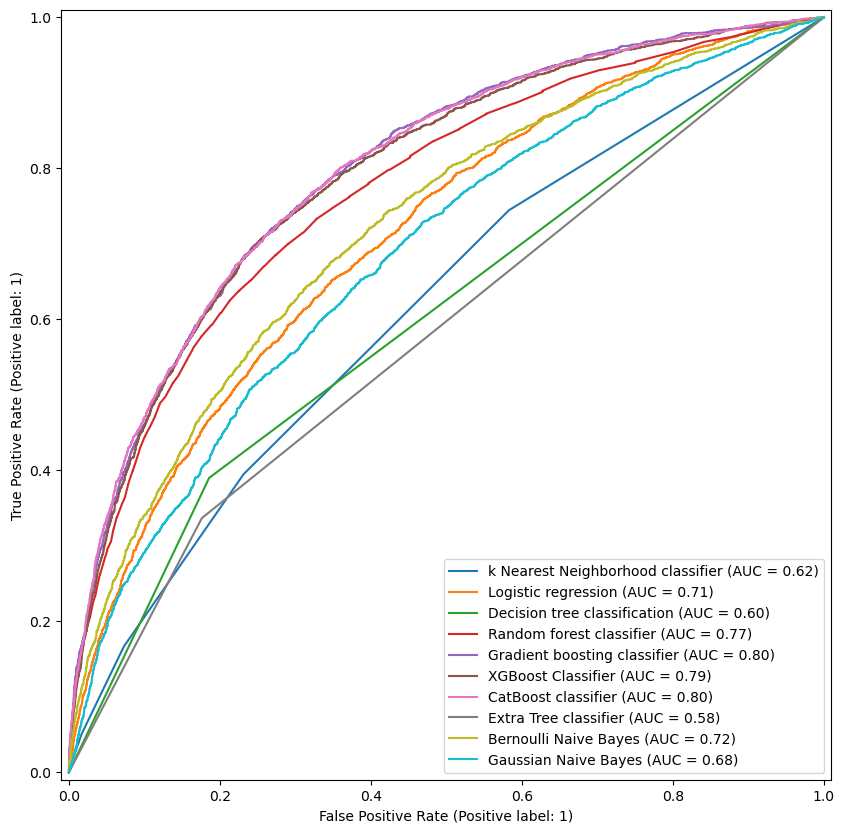

In [250]:
fig, ax = plt.subplots(figsize=(10, 10))

RocCurveDisplay.from_estimator(kNN, X_test, y_test, name='k Nearest Neighborhood classifier', ax=ax)

RocCurveDisplay.from_estimator(logreg, X_test, y_test, name='Logistic regression', ax=ax)

RocCurveDisplay.from_estimator(dtc, X_test, y_test,name='Decision tree classification', ax=ax)

RocCurveDisplay.from_estimator(rfc, X_test, y_test, name='Random forest classifier', ax=ax)

RocCurveDisplay.from_estimator(gbc, X_test, y_test, name='Gradient boosting classifier', ax=ax)

RocCurveDisplay.from_estimator(xg, X_test, y_test, name='XGBoost Classifier', ax=ax)

RocCurveDisplay.from_estimator(cb, X_test, y_test,name='CatBoost classifier',ax=ax)

RocCurveDisplay.from_estimator(ext, X_test, y_test,name='Extra Tree classifier',ax=ax)

RocCurveDisplay.from_estimator(bnb, X_test, y_test,name='Bernoulli Naive Bayes',ax=ax)

RocCurveDisplay.from_estimator(gnb, X_test, y_test,name='Gaussian Naive Bayes',ax=ax)

plt.show()